<a href="https://colab.research.google.com/github/ayanoglu/Sensor-Network-Prediction-Models/blob/main-correlations/ColdChainTransportation_Time_Series_Prediction_For_Sensor_Networks_Prediction_based_on_number_of_sensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARIES AND DATASET**

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from numpy import array
from sklearn import preprocessing
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
np.set_printoptions(linewidth=160)
import tensorflow as tf
import csv
import math
import matplotlib.pyplot as plt
from decimal import *
from google.colab import files
import plotly.graph_objects as go
import plotly.express as px
import itertools
from itertools import combinations
import time
from sklearn.metrics import mean_squared_error

uploaded = files.upload()

Saving S2.csv to S2.csv
Saving S3.csv to S3.csv
Saving S4.csv to S4.csv
Saving S5.csv to S5.csv
Saving S6.csv to S6.csv


**READ IN THE CSV FILE, LOCATE COLUMNS AND SAVE AS FEATURES**

**PLOT "Front Top", "Mid Top" AND "Rear Top"**

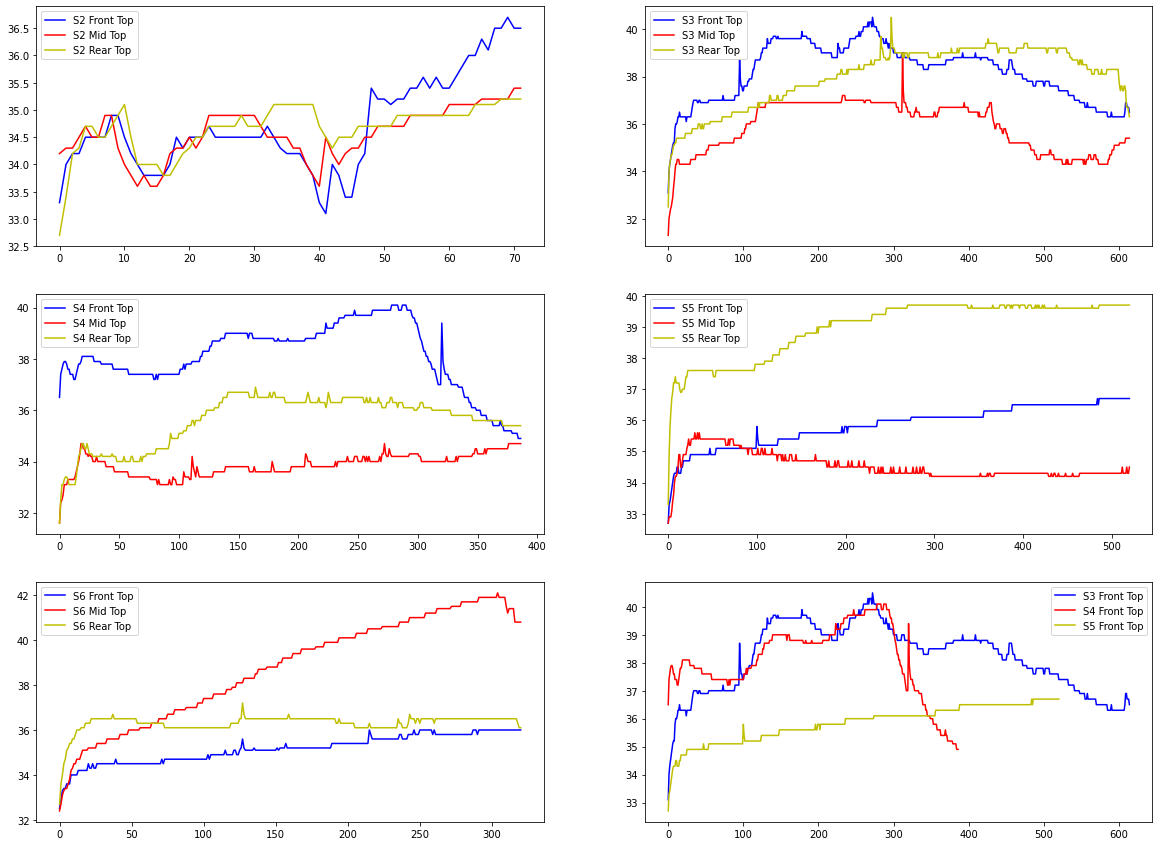

In [2]:
import io
S2 = pd.read_csv(io.BytesIO(uploaded['S2.csv']))
S3 = pd.read_csv(io.BytesIO(uploaded['S3.csv']))
S4 = pd.read_csv(io.BytesIO(uploaded['S4.csv']))
S5 = pd.read_csv(io.BytesIO(uploaded['S5.csv']))
S6 = pd.read_csv(io.BytesIO(uploaded['S6.csv']))

def csvtocolumns(dataset):
  FT = dataset.iloc[:,1]
  FM = dataset.iloc[:,2]
  FB = dataset.iloc[:,3]
  MT = dataset.iloc[:,4]
  MM = dataset.iloc[:,5]
  MB = dataset.iloc[:,6]
  RT = dataset.iloc[:,7]
  RM = dataset.iloc[:,8]
  RB = dataset.iloc[:,9]
  return FT, FM, FB, MT, MM, MB, RT, RM, RB

S2FT, S2FM, S2FB, S2MT, S2MM, S2MB, S2RT, S2RM, S2RB = csvtocolumns(S2)
S3FT, S3FM, S3FB, S3MT, S3MM, S3MB, S3RT, S3RM, S3RB = csvtocolumns(S3)
S4FT, S4FM, S4FB, S4MT, S4MM, S4MB, S4RT, S4RM, S4RB = csvtocolumns(S4)
S5FT, S5FM, S5FB, S5MT, S5MM, S5MB, S5RT, S5RM, S5RB = csvtocolumns(S5)
S6FT, S6FM, S6FB, S6MT, S6MM, S6MB, S6RT, S6RM, S6RB = csvtocolumns(S6)

#print(f'Length of S2 {len(S2FT)} , {len(S2FM)} , {len(S2FB)} , {len(S2MT)} , {len(S2MM)} , {len(S2MB)} , {len(S2RT)} , {len(S2RM)} , {len(S2RB)}')
#print(f'Length of S2 {len(S3FT)} , {len(S3FM)} , {len(S3FB)} , {len(S3MT)} , {len(S3MM)} , {len(S3MB)} , {len(S3RT)} , {len(S3RM)} , {len(S3RB)}')
#print(f'Length of S2 {len(S4FT)} , {len(S4FM)} , {len(S4FB)} , {len(S4MT)} , {len(S4MM)} , {len(S4MB)} , {len(S4RT)} , {len(S4RM)} , {len(S4RB)}')
#print(f'Length of S2 {len(S5FT)} , {len(S5FM)} , {len(S5FB)} , {len(S5MT)} , {len(S5MM)} , {len(S5MB)} , {len(S5RT)} , {len(S5RM)} , {len(S5RB)}')
#print(f'Length of S2 {len(S6FT)} , {len(S6FM)} , {len(S6FB)} , {len(S6MT)} , {len(S6MM)} , {len(S6MB)} , {len(S6RT)} , {len(S6RM)} , {len(S6RB)}')

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

ax[0,0].plot(S2FT, "b", label='S2 Front Top')
ax[0,0].plot(S2MT, "r", label='S2 Mid Top')
ax[0,0].plot(S2RT, "y", label='S2 Rear Top')
ax[0,0].legend()

ax[0,1].plot(S3FT, "b", label='S3 Front Top')
ax[0,1].plot(S3MT, "r", label='S3 Mid Top')
ax[0,1].plot(S3RT, "y", label='S3 Rear Top')
ax[0,1].legend()

ax[1,0].plot(S4FT, "b", label='S4 Front Top')
ax[1,0].plot(S4MT, "r", label='S4 Mid Top')
ax[1,0].plot(S4RT, "y", label='S4 Rear Top')
ax[1,0].legend()

ax[1,1].plot(S5FT, "b", label='S5 Front Top')
ax[1,1].plot(S5MT, "r", label='S5 Mid Top')
ax[1,1].plot(S5RT, "y", label='S5 Rear Top')
ax[1,1].legend()

ax[2,0].plot(S6FT, "b", label='S6 Front Top')
ax[2,0].plot(S6MT, "r", label='S6 Mid Top')
ax[2,0].plot(S6RT, "y", label='S6 Rear Top')
ax[2,0].legend()

ax[2,1].plot(S3FT, "b", label='S3 Front Top')
ax[2,1].plot(S4FT, "r", label='S4 Front Top')
ax[2,1].plot(S5FT, "y", label='S5 Front Top')
ax[2,1].legend()

plt.show()

In [3]:
print(f'Any Nan values in S2? {(S2.isnull().values.any())}')
print(f'Any Nan values in S3? {(S3.isnull().values.any())}')
print(f'Any Nan values in S4? {(S4.isnull().values.any())}')
print(f'Any Nan values in S5? {(S5.isnull().values.any())}')
print(f'Any Nan values in S6? {(S6.isnull().values.any())}')

S6FT, S6FM, S6FB, S6MT, S6MM, S6MB, S6RT, S6RM, S6RB

print(f'Any Nan values in S6FT? {(S6FT.isnull().values.any())}')
print(f'Any Nan values in S6FM? {(S6FM.isnull().values.any())}')
print(f'Any Nan values in S6FB? {(S6FB.isnull().values.any())}')
print(f'Any Nan values in S6MT? {(S6MT.isnull().values.any())}')
print(f'Any Nan values in S6MM? {(S6MM.isnull().values.any())}')
print(f'Any Nan values in S6MB? {(S6MB.isnull().values.any())}')
print(f'Any Nan values in S6RT? {(S6RT.isnull().values.any())}')
print(f'Any Nan values in S6RM? {(S6RM.isnull().values.any())}')
print(f'Any Nan values in S6RB? {(S6RB.isnull().values.any())}')

Any Nan values in S2? False
Any Nan values in S3? False
Any Nan values in S4? False
Any Nan values in S5? False
Any Nan values in S6? True
Any Nan values in S6FT? False
Any Nan values in S6FM? False
Any Nan values in S6FB? True
Any Nan values in S6MT? False
Any Nan values in S6MM? False
Any Nan values in S6MB? False
Any Nan values in S6RT? False
Any Nan values in S6RM? False
Any Nan values in S6RB? False


Create Correlation Matrices

In [4]:
X_FT = np.concatenate((S2FT, S3FT, S4FT, S5FT, S6FT), axis=0)
X_FM = np.concatenate((S2FM, S3FM, S4FM, S5FM, S6FM), axis=0)
X_FB = np.concatenate((S2FB, S3FB, S4FB, S5FB, S6FB), axis=0)

X_MT = np.concatenate((S2MT, S3MT, S4MT, S5MT, S6MT), axis=0)
X_MM = np.concatenate((S2MM, S3MM, S4MM, S5MM, S6MM), axis=0)
X_MB = np.concatenate((S2MB, S3MB, S4MB, S5MB, S6MB), axis=0)

X_RT = np.concatenate((S2RT, S3RT, S4RT, S5RT, S6RT), axis=0)
X_RM = np.concatenate((S2RM, S3RM, S4RM, S5RM, S6RM), axis=0)
X_RB = np.concatenate((S2RB, S3RB, S4RB, S5RB, S6RB), axis=0)


In [5]:
#print( len(X_FT), len(X_FM), len(X_MT), len(X_MM), len(X_MB), len(X_RT), len(X_RM), len(X_RB))
#X_FT.shape
X_FT = X_FT.reshape((X_FT.shape[0],1))
X_FM = X_FM.reshape((X_FM.shape[0],1))
X_MT = X_MT.reshape((X_MT.shape[0],1))
X_MM = X_MM.reshape((X_MM.shape[0],1))
X_MB = X_MB.reshape((X_MB.shape[0],1))
X_RT = X_RT.reshape((X_RT.shape[0],1))
X_RM = X_RM.reshape((X_RM.shape[0],1))
X_RB = X_RB.reshape((X_RB.shape[0],1))
DM = np.concatenate((X_FT, X_FM, X_MT, X_MM, X_MB, X_RT, X_RM, X_RB), axis=1)
DM.shape

(1916, 8)

In [6]:
DF = pd.DataFrame(DM, columns = ['X_FT', 'X_FM', 'X_MT', 'X_MM', 'X_MB', 'X_RT', 'X_RM', 'X_RB'])

In [7]:
list(DF.columns)

['X_FT', 'X_FM', 'X_MT', 'X_MM', 'X_MB', 'X_RT', 'X_RM', 'X_RB']

In [8]:
cormat = DF.corr().abs()
round(cormat,2)

,X_FT,X_FM,X_MT,X_MM,X_MB,X_RT,X_RM,X_RB
X_FT,1.00,0.36,0.08,0.03,0.15,0.14,0.07,0.20
X_FM,0.36,1.00,0.60,0.75,0.50,0.43,0.63,0.73
X_MT,0.08,0.60,1.00,0.80,0.75,0.02,0.32,0.34
X_MM,0.03,0.75,0.80,1.00,0.87,0.38,0.73,0.66
X_MB,0.15,0.50,0.75,0.87,1.00,0.22,0.52,0.42
X_RT,0.14,0.43,0.02,0.38,0.22,1.00,0.87,0.75
X_RM,0.07,0.63,0.32,0.73,0.52,0.87,1.00,0.85
X_RB,0.20,0.73,0.34,0.66,0.42,0.75,0.85,1.00


In [9]:
DF.corr().unstack().sort_values().drop_duplicates()

X_FT  X_MB   -0.154674
      X_MT   -0.080140
X_MM  X_FT   -0.033999
X_MT  X_RT   -0.021185
X_RM  X_FT    0.072515
X_RT  X_FT    0.144607
X_RB  X_FT    0.202862
X_MB  X_RT    0.221234
X_RM  X_MT    0.315393
X_MT  X_RB    0.337121
X_FM  X_FT    0.364202
X_MM  X_RT    0.381633
X_MB  X_RB    0.417856
X_RT  X_FM    0.432132
X_FM  X_MB    0.496467
X_RM  X_MB    0.519073
X_FM  X_MT    0.595781
X_RM  X_FM    0.625397
X_MM  X_RB    0.659424
      X_RM    0.725837
X_RB  X_FM    0.734268
      X_RT    0.752226
X_MB  X_MT    0.752528
X_MM  X_FM    0.752747
      X_MT    0.803041
X_RM  X_RB    0.848665
      X_RT    0.865048
X_MM  X_MB    0.866994
X_FT  X_FT    1.000000
dtype: float64

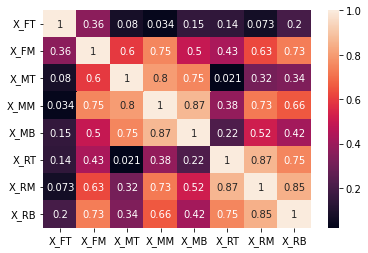

In [10]:
import seaborn as sns
sns.heatmap(cormat, annot=True);


In [11]:
s = np.sum(cormat, axis=0)
s

X_FT    2.052999
X_FM    5.000994
X_MT    3.905189
X_MM    5.223675
X_MB    4.428825
X_RT    3.818065
X_RM    4.971929
X_RB    4.952423
dtype: float64

In [12]:
ss = s.sort_values()
ss

X_FT    2.052999
X_RT    3.818065
X_MT    3.905189
X_MB    4.428825
X_RB    4.952423
X_RM    4.971929
X_FM    5.000994
X_MM    5.223675
dtype: float64

In [ ]:
X_FTavg = cormat.loc['X_FT']
X_FTavg = X_FTavg.drop('X_FT')
X_FTavg = X_FTavg.to_dict()

my_dictX_FTavg = {"X_FTavg":[],"Avg_Value":[]};
for combo in combinations(X_FTavg.items(), 2):
  kX1, kX2 = combo[0][0], combo[1][0]
  vX1, vX2 = combo[0][1], combo[1][1]
  vAvg = (vX1 + vX2)/2
  my_dictX_FTavg["X_FTavg"].append(kX1 + kX2)
  my_dictX_FTavg["Avg_Value"].append(vAvg)

DFX_FTavg = pd.DataFrame.from_dict(my_dictX_FTavg)
DFX_FTavg = DFX_FTavg.sort_values('Avg_Value', ascending=False)
index = DFX_FTavg.index
index.name = "The correlation values of other sensors with X_FT paired, avaraged"

DFX_FTavg.to_csv('DFX_FTavg.csv')
files.download("DFX_FTavg.csv")

DFX_FTavg

In [ ]:
X_FMavg = cormat.loc['X_FM']
X_FMavg = X_FMavg.drop('X_FM')
X_FMavg = X_FMavg.to_dict()

my_dictX_FMavg = {"X_FMavg":[],"Avg_Value":[]};
for combo in combinations(X_FMavg.items(), 2):
  kX1, kX2 = combo[0][0], combo[1][0]
  vX1, vX2 = combo[0][1], combo[1][1]
  vAvg = (vX1 + vX2)/2
  my_dictX_FMavg["X_FMavg"].append(kX1 + kX2)
  my_dictX_FMavg["Avg_Value"].append(vAvg)

DFX_FMavg = pd.DataFrame.from_dict(my_dictX_FMavg)
DFX_FMavg = DFX_FMavg.sort_values('Avg_Value', ascending=False)
index = DFX_FMavg.index
index.name = "The correlation values of other sensors with X_FM paired, avaraged"

DFX_FMavg.to_csv('DFX_FMavg.csv')
files.download("DFX_FMavg.csv")

DFX_FMavg

In [ ]:
X_MTavg = cormat.loc['X_MT']
X_MTavg = X_MTavg.drop('X_MT')
X_MTavg = X_MTavg.to_dict()

my_dictX_MTavg = {"X_MTavg":[],"Avg_Value":[]};
for combo in combinations(X_MTavg.items(), 2):
  kX1, kX2 = combo[0][0], combo[1][0]
  vX1, vX2 = combo[0][1], combo[1][1]
  vAvg = (vX1 + vX2)/2
  my_dictX_MTavg["X_MTavg"].append(kX1 + kX2)
  my_dictX_MTavg["Avg_Value"].append(vAvg)

DFX_MTavg = pd.DataFrame.from_dict(my_dictX_MTavg)
DFX_MTavg = DFX_MTavg.sort_values('Avg_Value', ascending=False)
index = DFX_MTavg.index
index.name = "The correlation values of other sensors with X_MT paired, avaraged"

DFX_MTavg.to_csv('DFX_MTavg.csv')
files.download("DFX_MTavg.csv")

DFX_MTavg

In [ ]:
X_MMavg = cormat.loc['X_MM']
X_MMavg = X_MMavg.drop('X_MM')
X_MMavg = X_MMavg.to_dict()

my_dictX_MMavg = {"X_MMavg":[],"Avg_Value":[]};
for combo in combinations(X_MMavg.items(), 2):
  kX1, kX2 = combo[0][0], combo[1][0]
  vX1, vX2 = combo[0][1], combo[1][1]
  vAvg = (vX1 + vX2)/2
  my_dictX_MMavg["X_MMavg"].append(kX1 + kX2)
  my_dictX_MMavg["Avg_Value"].append(vAvg)

DFX_MMavg = pd.DataFrame.from_dict(my_dictX_MMavg)
DFX_MMavg = DFX_MMavg.sort_values('Avg_Value', ascending=False)
index = DFX_MMavg.index
index.name = "The correlation values of other sensors with X_MM paired, avaraged"

DFX_MMavg.to_csv('DFX_MMavg.csv')
files.download("DFX_MMavg.csv")

DFX_MMavg

In [ ]:
X_MBavg = cormat.loc['X_MB']
X_MBavg = X_MBavg.drop('X_MB')
X_MBavg = X_MBavg.to_dict()

my_dictX_MBavg = {"X_MBavg":[],"Avg_Value":[]};
for combo in combinations(X_MBavg.items(), 2):
  kX1, kX2 = combo[0][0], combo[1][0]
  vX1, vX2 = combo[0][1], combo[1][1]
  vAvg = (vX1 + vX2)/2
  my_dictX_MBavg["X_MBavg"].append(kX1 + kX2)
  my_dictX_MBavg["Avg_Value"].append(vAvg)

DFX_MBavg = pd.DataFrame.from_dict(my_dictX_MBavg)
DFX_MBavg = DFX_MBavg.sort_values('Avg_Value', ascending=False)
index = DFX_MBavg.index
index.name = "The correlation values of other sensors with X_MB paired, avaraged"

DFX_MBavg.to_csv('DFX_MBavg.csv')
files.download("DFX_MBavg.csv")

DFX_MBavg

In [ ]:
X_RTavg = cormat.loc['X_RT']
X_RTavg = X_RTavg.drop('X_RT')
X_RTavg = X_RTavg.to_dict()

my_dictX_RTavg = {"X_RTavg":[],"Avg_Value":[]};
for combo in combinations(X_RTavg.items(), 2):
  kX1, kX2 = combo[0][0], combo[1][0]
  vX1, vX2 = combo[0][1], combo[1][1]
  vAvg = (vX1 + vX2)/2
  my_dictX_RTavg["X_RTavg"].append(kX1 + kX2)
  my_dictX_RTavg["Avg_Value"].append(vAvg)

DFX_RTavg = pd.DataFrame.from_dict(my_dictX_RTavg)
DFX_RTavg = DFX_RTavg.sort_values('Avg_Value', ascending=False)
index = DFX_RTavg.index
index.name = "The correlation values of other sensors with X_RT paired, avaraged"

DFX_RTavg.to_csv('DFX_RTavg.csv')
files.download("DFX_RTavg.csv")

DFX_RTavg

In [ ]:
X_RMavg = cormat.loc['X_RM']
X_RMavg = X_RMavg.drop('X_RM')
X_RMavg = X_RMavg.to_dict()

my_dictX_RMavg = {"X_RMavg":[],"Avg_Value":[]};
for combo in combinations(X_RMavg.items(), 2):
  kX1, kX2 = combo[0][0], combo[1][0]
  vX1, vX2 = combo[0][1], combo[1][1]
  vAvg = (vX1 + vX2)/2
  my_dictX_RMavg["X_RMavg"].append(kX1 + kX2)
  my_dictX_RMavg["Avg_Value"].append(vAvg)

DFX_RMavg = pd.DataFrame.from_dict(my_dictX_RMavg)
DFX_RMavg = DFX_RMavg.sort_values('Avg_Value', ascending=False)
index = DFX_RMavg.index
index.name = "The correlation values of other sensors with X_RM paired, avaraged"

DFX_RMavg.to_csv('DFX_RMavg.csv')
files.download("DFX_RMavg.csv")

DFX_RMavg

In [ ]:
X_RBavg = cormat.loc['X_RB']
X_RBavg = X_RBavg.drop('X_RB')
X_RBavg = X_RBavg.to_dict()

my_dictX_RBavg = {"X_RBavg":[],"Avg_Value":[]};
for combo in combinations(X_RBavg.items(), 2):
  kX1, kX2 = combo[0][0], combo[1][0]
  vX1, vX2 = combo[0][1], combo[1][1]
  vAvg = (vX1 + vX2)/2
  my_dictX_RBavg["X_RBavg"].append(kX1 + kX2)
  my_dictX_RBavg["Avg_Value"].append(vAvg)

DFX_RBavg = pd.DataFrame.from_dict(my_dictX_RBavg)
DFX_RBavg = DFX_RBavg.sort_values('Avg_Value', ascending=False)
index = DFX_RBavg.index
index.name = "The correlation values of other sensors with X_RB paired, avaraged"

DFX_RBavg.to_csv('DFX_RBavg.csv')
files.download("DFX_RBavg.csv")

DFX_RBavg

In [ ]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

#x = np.array([1, 2, 3, 3, 7])
#y = np.array([1, 2, 2, 2, 2, 2, 2, 4])

#distance, path = fastdtw(x, y, dist=euclidean)
TrainDataSet = { 'X_FT': X_FT, 'X_FM': X_FM, 'X_MT':X_MT, 'X_MM':X_MM, 'X_MB':X_MB, 'X_RT':X_RT, 'X_RM':X_RM, 'X_RB':X_RB }
TestDataSet = { 'X_FT': X_FT, 'X_FM': X_FM, 'X_MT':X_MT, 'X_MM':X_MM, 'X_MB':X_MB, 'X_RT':X_RT, 'X_RM':X_RM, 'X_RB':X_RB }
DictDTW = {"DataName1":[] ,"DataName2":[] , "Distance":[]}

for combo in combinations(TrainDataSet.items(), 1):
  kX1 = combo[0][0]
  vX1 = combo[0][1]
  for ky, vy  in TestDataSet.items():
    if ky[-2:] == kX1[-2:]:
      continue
    distance, path = fastdtw(vX1, vy, dist=euclidean)
    print(kX1 + ky)
    print(distance)
    DictDTW["DataName1"].append(kX1)
    DictDTW["DataName2"].append(ky)
    DictDTW["Distance"].append(distance)
    #print(path)
    print('*******************')


In [114]:
DF_DTW = pd.DataFrame.from_dict(DictDTW, orient='columns')
DF_DTW = DF_DTW.sort_values(by=['Distance'])

DF_DTW = DF_DTW.reset_index(drop = True)
DF_DTW

,DataName1,DataName2,Distance
0,X_MM,X_MT,575.7
1,X_MT,X_MM,581.9
2,X_FM,X_MM,728.3
3,X_MM,X_FM,737.5
4,X_RT,X_RM,767.3
5,X_RM,X_RT,782.0
6,X_MB,X_MM,832.1
7,X_MM,X_MB,838.3
8,X_FM,X_RB,952.1
9,X_RB,X_FM,975.7


In [115]:
#DF_DTWgrouped = DF_DTW.groupby(['DataName1']).mean()
DF_DTWgrouped = DF_DTW.sort_values(by=['DataName1'])
DF_DTWgrouped = DF_DTWgrouped.reset_index(drop = True)

In [116]:
DF_DTWgrouped.to_csv('DF_DTWgrouped.csv')
files.download("DF_DTWgrouped.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [119]:
uploaded = files.upload()

Saving DF_DTWgrouped.csv to DF_DTWgrouped (2).csv


In [120]:
DF_DTWgrouped = pd.read_csv(io.BytesIO(uploaded['DF_DTWgrouped.csv']), index_col=False)
DF_DTWgrouped

,DataName1,DataName2,Distance
0,X_FM,X_MB,1574.2
1,X_FM,X_RM,1077.3
2,X_FM,X_FT,1467.7
3,X_FM,X_RB,952.1
4,X_FM,X_RT,1601.9
5,X_FM,X_MT,1195.6
6,X_FM,X_MM,728.3
7,X_FT,X_MM,1962.9
8,X_FT,X_MT,2564.1
9,X_FT,X_RM,1326.9


In [121]:
X_FMdtw = DF_DTWgrouped.iloc[0:7].drop('DataName1', axis = 1).sort_values(by=['Distance'])
X_FTdtw = DF_DTWgrouped.iloc[7:14].drop('DataName1', axis = 1).sort_values(by=['Distance'])
X_MBdtw = DF_DTWgrouped.iloc[14:21].drop('DataName1', axis = 1).sort_values(by=['Distance'])
X_MMdtw = DF_DTWgrouped.iloc[21:28].drop('DataName1', axis = 1).sort_values(by=['Distance'])
X_MTdtw = DF_DTWgrouped.iloc[28:35].drop('DataName1', axis = 1).sort_values(by=['Distance'])
X_RBdtw = DF_DTWgrouped.iloc[35:42].drop('DataName1', axis = 1).sort_values(by=['Distance'])
X_RMdtw = DF_DTWgrouped.iloc[42:49].drop('DataName1', axis = 1).sort_values(by=['Distance'])
X_RTdtw = DF_DTWgrouped.iloc[49:56].drop('DataName1', axis = 1).sort_values(by=['Distance'])

In [123]:
X_FMdtw

,DataName2,Distance
6,X_MM,728.3
3,X_RB,952.1
1,X_RM,1077.3
5,X_MT,1195.6
2,X_FT,1467.7
0,X_MB,1574.2
4,X_RT,1601.9


In [139]:
DictX_FMdtw = X_FMdtw.set_index('DataName2')['Distance'].to_dict()
DictX_FMdtw

{'X_FT': 1467.7,
 'X_MB': 1574.2,
 'X_MM': 728.3,
 'X_MT': 1195.6,
 'X_RB': 952.1,
 'X_RM': 1077.3,
 'X_RT': 1601.9}

In [ ]:
DictX_FMdtw = X_FMdtw.set_index('DataName2')['Distance'].to_dict()

my_dictX_FMdtw = {"X_FMdtw":[],"Avg_Value":[]};
for combo in combinations(DictX_FMdtw.items(), 2):
  kX1, kX2 = combo[0][0], combo[1][0]
  vX1, vX2 = combo[0][1], combo[1][1]
  vAvg = (vX1 + vX2)/2
  my_dictX_FMdtw["X_FMdtw"].append(kX1 + kX2)
  my_dictX_FMdtw["Avg_Value"].append(vAvg)

DFX_FMdtw = pd.DataFrame.from_dict(my_dictX_FMdtw)
DFX_FMdtw = DFX_FMdtw.sort_values('Avg_Value', ascending=True)
index = DFX_FMdtw.index
index.name = "The distance DTW values of other sensors with X_FM paired, avaraged"

DFX_FMdtw.to_csv('DFX_FMdtwavg.csv')
files.download("DFX_FMdtwavg.csv")

#DFX_FMdtw

In [143]:
DictX_FTdtw = X_FTdtw.set_index('DataName2')['Distance'].to_dict()

my_dictX_FTdtw = {"X_FTdtw":[],"Avg_Value":[]};
for combo in combinations(DictX_FTdtw.items(), 2):
  kX1, kX2 = combo[0][0], combo[1][0]
  vX1, vX2 = combo[0][1], combo[1][1]
  vAvg = (vX1 + vX2)/2
  my_dictX_FTdtw["X_FTdtw"].append(kX1 + kX2)
  my_dictX_FTdtw["Avg_Value"].append(vAvg)

DFX_FTdtw = pd.DataFrame.from_dict(my_dictX_FTdtw)
DFX_FTdtw = DFX_FTdtw.sort_values('Avg_Value', ascending=True)
index = DFX_FTdtw.index
index.name = "The distance DTW values of other sensors with X_FT paired, avaraged"

DFX_FTdtw.to_csv('DFX_FTdtwavg.csv')
files.download("DFX_FTdtwavg.csv")

#DFX_FTdtw

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [144]:
DictX_MBdtw = X_MBdtw.set_index('DataName2')['Distance'].to_dict()

my_dictX_MBdtw = {"X_MBdtw":[],"Avg_Value":[]};
for combo in combinations(DictX_MBdtw.items(), 2):
  kX1, kX2 = combo[0][0], combo[1][0]
  vX1, vX2 = combo[0][1], combo[1][1]
  vAvg = (vX1 + vX2)/2
  my_dictX_MBdtw["X_MBdtw"].append(kX1 + kX2)
  my_dictX_MBdtw["Avg_Value"].append(vAvg)

DFX_MBdtw = pd.DataFrame.from_dict(my_dictX_MBdtw)
DFX_MBdtw = DFX_MBdtw.sort_values('Avg_Value', ascending=True)
index = DFX_MBdtw.index
index.name = "The distance DTW values of other sensors with X_MB paired, avaraged"

DFX_MBdtw.to_csv('DFX_MBdtwavg.csv')
files.download("DFX_MBdtwavg.csv")

#DFX_MBdtw

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [145]:
DictX_MMdtw = X_MMdtw.set_index('DataName2')['Distance'].to_dict()

my_dictX_MMdtw = {"X_MMdtw":[],"Avg_Value":[]};
for combo in combinations(DictX_MMdtw.items(), 2):
  kX1, kX2 = combo[0][0], combo[1][0]
  vX1, vX2 = combo[0][1], combo[1][1]
  vAvg = (vX1 + vX2)/2
  my_dictX_MMdtw["X_MMdtw"].append(kX1 + kX2)
  my_dictX_MMdtw["Avg_Value"].append(vAvg)

DFX_MMdtw = pd.DataFrame.from_dict(my_dictX_MMdtw)
DFX_MMdtw = DFX_MMdtw.sort_values('Avg_Value', ascending=True)
index = DFX_MMdtw.index
index.name = "The distance DTW values of other sensors with X_MM paired, avaraged"

DFX_MMdtw.to_csv('DFX_MMdtwavg.csv')
files.download("DFX_MMdtwavg.csv")

#DFX_MMdtw

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [146]:
DictX_MTdtw = X_MTdtw.set_index('DataName2')['Distance'].to_dict()

my_dictX_MTdtw = {"X_MTdtw":[],"Avg_Value":[]};
for combo in combinations(DictX_MTdtw.items(), 2):
  kX1, kX2 = combo[0][0], combo[1][0]
  vX1, vX2 = combo[0][1], combo[1][1]
  vAvg = (vX1 + vX2)/2
  my_dictX_MTdtw["X_MTdtw"].append(kX1 + kX2)
  my_dictX_MTdtw["Avg_Value"].append(vAvg)

DFX_MTdtw = pd.DataFrame.from_dict(my_dictX_MTdtw)
DFX_MTdtw = DFX_MTdtw.sort_values('Avg_Value', ascending=True)
index = DFX_MTdtw.index
index.name = "The distance DTW values of other sensors with X_MT paired, avaraged"

DFX_MTdtw.to_csv('DFX_MTdtwavg.csv')
files.download("DFX_MTdtwavg.csv")

#DFX_MTdtw

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [147]:
DictX_RBdtw = X_RBdtw.set_index('DataName2')['Distance'].to_dict()

my_dictX_RBdtw = {"X_RBdtw":[],"Avg_Value":[]};
for combo in combinations(DictX_RBdtw.items(), 2):
  kX1, kX2 = combo[0][0], combo[1][0]
  vX1, vX2 = combo[0][1], combo[1][1]
  vAvg = (vX1 + vX2)/2
  my_dictX_RBdtw["X_RBdtw"].append(kX1 + kX2)
  my_dictX_RBdtw["Avg_Value"].append(vAvg)

DFX_RBdtw = pd.DataFrame.from_dict(my_dictX_RBdtw)
DFX_RBdtw = DFX_RBdtw.sort_values('Avg_Value', ascending=True)
index = DFX_RBdtw.index
index.name = "The distance DTW values of other sensors with X_RB paired, avaraged"

DFX_RBdtw.to_csv('DFX_RBdtwavg.csv')
files.download("DFX_RBdtwavg.csv")

#DFX_RBdtw

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [148]:
DictX_RMdtw = X_RMdtw.set_index('DataName2')['Distance'].to_dict()

my_dictX_RMdtw = {"X_RMdtw":[],"Avg_Value":[]};
for combo in combinations(DictX_RMdtw.items(), 2):
  kX1, kX2 = combo[0][0], combo[1][0]
  vX1, vX2 = combo[0][1], combo[1][1]
  vAvg = (vX1 + vX2)/2
  my_dictX_RMdtw["X_RMdtw"].append(kX1 + kX2)
  my_dictX_RMdtw["Avg_Value"].append(vAvg)

DFX_RMdtw = pd.DataFrame.from_dict(my_dictX_RMdtw)
DFX_RMdtw = DFX_RMdtw.sort_values('Avg_Value', ascending=True)
index = DFX_RMdtw.index
index.name = "The distance DTW values of other sensors with X_RM paired, avaraged"

DFX_RMdtw.to_csv('DFX_RMdtwavg.csv')
files.download("DFX_RMdtwavg.csv")

#DFX_RMdtw

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [149]:
DictX_RTdtw = X_RTdtw.set_index('DataName2')['Distance'].to_dict()

my_dictX_RTdtw = {"X_RTdtw":[],"Avg_Value":[]};
for combo in combinations(DictX_RTdtw.items(), 2):
  kX1, kX2 = combo[0][0], combo[1][0]
  vX1, vX2 = combo[0][1], combo[1][1]
  vAvg = (vX1 + vX2)/2
  my_dictX_RTdtw["X_RTdtw"].append(kX1 + kX2)
  my_dictX_RTdtw["Avg_Value"].append(vAvg)

DFX_RTdtw = pd.DataFrame.from_dict(my_dictX_RTdtw)
DFX_RTdtw = DFX_RTdtw.sort_values('Avg_Value', ascending=True)
index = DFX_RTdtw.index
index.name = "The distance DTW values of other sensors with X_RT paired, avaraged"

DFX_RTdtw.to_csv('DFX_RTdtwavg.csv')
files.download("DFX_RTdtwavg.csv")

#DFX_RTdtw

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>